In [1]:
# Dies sind einige der Pakete, die wir verwenden, um mit Python zu Programmieren!
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

import numpy as np
np.random.seed(1)

## Lineare Regression
### Was ist lineare Regression?
Bei linearer Regression handelt es sich um ein statistisches Verfahren, womit ein einfaches Modell erstellt wird, welches einen Datensatz optimal abbildet. Oft wird dieses Verfahren verwendet, um einen Trend in Daten zu erkennen, womit eventuell eine Vorhersage für zukünftige Werte gemacht werden kann.

### Stell dir vor, du bekommst folgende Aufgabe:
Du hast Daten bekommen für den Wasserstand eines Sees. 
In diesen Daten steht für jede Stunde der Wasserstand in cm. über einen Zeitraum von einer Woche.

Nun ist es deine Aufgabe mit diesen Messungen eine Vorhersage darüber zu machen, wo der Wasserstand sich am Ende des achten Tages befindet.

Hier kann die lineare Regression helfen, denn sie ermöglicht es dir, einen Trend in den Daten mathematisch zu erkennen. Aber bevor wir und genauer lineare Regression anschauen, werfen wir zunächst einen Blick auf die Daten.

### Datensatz

Text(0.5, 1.0, 'Jeder Punkt ist eine Messung')

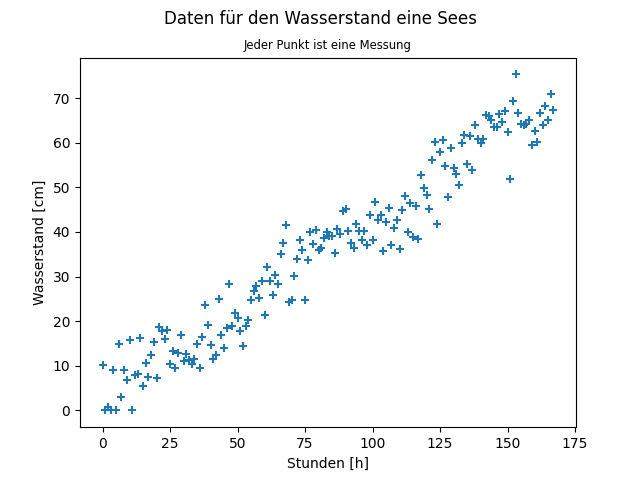

In [2]:
np.random.seed(1)
#plt.rcParams["figure.figsize"] = (20, 10)
#plt.rcParams["font.size"] = 22
stunden_in_woche = 7 * 24
xWerte = np.arange(stunden_in_woche)
yWerte = np.clip(
    xWerte * 0.4
    + np.random.normal(2, 5, size=(stunden_in_woche,))
    + 3 * np.sin(0.1 * xWerte),
    0,
    np.inf
)


fig, ax = plt.subplots()
ax.scatter(xWerte, yWerte, marker="+")
fig.suptitle("Daten für den Wasserstand eine Sees")
ax.set_xlabel("Stunden [h]")
ax.set_ylabel("Wasserstand [cm]")
ax.set_title("Jeder Punkt ist eine Messung", fontsize="small")


Bei diesen Daten ist der Trend klar zu erkennen. Sogar ohne etwas auszurechnen kannst du leicht erkennen, dass sich der Wasserstand höchstwahrscheinlich in den nächsten Tagen erhöhen wird.
Du kannst mit den Schiebereglern in dem folgenden Graphen die Steigung und den y-Achsenabschnitt einstellen für eine Gerade, die den Trend der Daten darstellt.
### Aufgabe
- Versuche die optimalen Werte für Steigung und y-Achsenabschnitt zu finden.
- Wieso sind diese Werte optimal?


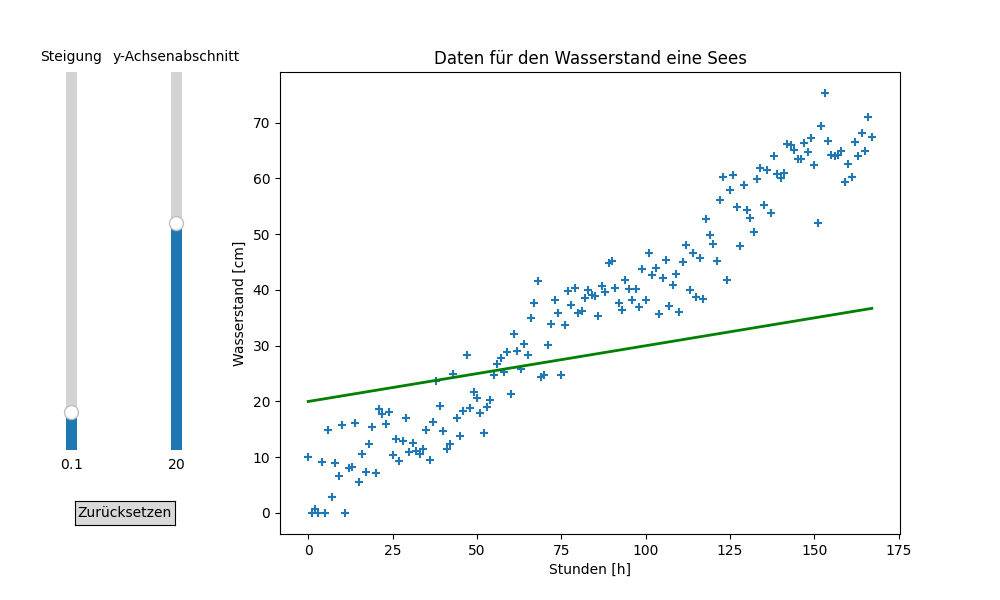

In [3]:
fig, ax = plt.subplots(figsize=(10,6))
line, = plt.plot(xWerte, 0.1*xWerte+20, 'green', lw=2)
ax.set_xlabel("Stunden [h]")
ax.set_ylabel("Wasserstand [cm]")
ax.set_title("Daten für den Wasserstand eine Sees")
ax.scatter(xWerte, yWerte, marker="+")
plt.subplots_adjust(left=0.28)

axamp = plt.axes([0.06, 0.25, 0.0225, 0.63])
steig = Slider(
    ax=axamp,
    label="Steigung",
    valmin=0,
    valmax=1,
    valinit=0.1,
    orientation="vertical"
)

axamp = plt.axes([0.165, 0.25, 0.0225, 0.63])
yachsab = Slider(
    ax=axamp,
    label="y-Achsenabschnitt",
    valmin=-10,
    valmax=40,
    valinit=20,
    orientation="vertical"
)

resetax = plt.axes([0.075, 0.125, 0.1, 0.04])
button = Button(resetax, 'Zurücksetzen', hovercolor='0.975')

def update(val):
    line.set_ydata(xWerte * steig.val + yachsab.val)
    fig.canvas.draw_idle()

def reset(event):
    steig.reset()
    yachsab.reset()

steig.on_changed(update)
yachsab.on_changed(update)
button.on_clicked(reset)

plt.show()

Die offene Frage ist, wie wir ohne Ausprobieren einen optimalen Wert finden können.
Unser Ziel ist es, dass eine Gerade möglichst nah an allen Messpunkten liegt.

Konkret suchen wir eine Gerade $f(x)=m\cdot x + b$ wobei m die Steigung und b der y-Achsenabschnitt sind.

Und wir möchten, dass $f(x)$ für alle x-Werte 1,2,3,4,... möglichst nah an den gemessenen Werten liegt.

Am besten schauen wir uns die Idee nochmal an einem einfacheren Beispiel an:


| Zeitpunkt [x-Wert] | Messwert [y-Wert] | $x \cdot y$ | $x^2$      | $f(x)=m\cdot x + b$ | Unterschied f(x) und y-Wert         |   |
|--------------------|-------------------|-------------|------------|---------------------|-------------------------------------|---|
| 1                  | 3,6               | 3,6         | 1          | $m \cdot 1 + b$     | $\lvert m \cdot 1 + b - 3,6 \rvert$ |   |
| 2                  | 3,4               | 6,8         | 4          | $m \cdot 2 + b$     | $\lvert m \cdot 2 + b - 3,4 \rvert$ |   |
| 3                  | 4,0               | 12,0        | 9          | $m \cdot 3 + b$     | $\lvert m \cdot 3 + b - 4,0 \rvert$ |   |
| 4                  | 4,2               | 16,8        | 16         | $m \cdot 4 + b$     | $\lvert m \cdot 4 + b - 4,2 \rvert$ |   |
| 5                  | 4,7               | 23,5        | 25         | $m \cdot 5 + b$     | $\lvert m \cdot 5 + b - 4,7 \rvert$ |   |
| 6                  | 4,6               | 27,6        | 36         | $m \cdot 6 + b$     | $\lvert m \cdot 6 + b - 4,6 \rvert$ |   |
| 7                  | 5,1               | 35,7        | 49         | $m \cdot 7 + b$     | $\lvert m \cdot 7 + b - 5,1 \rvert$ |   |
| Summe: 28          | Summe: 29,6       | Summe: 126  | Summe: 140 |                     |                                     |   |

0

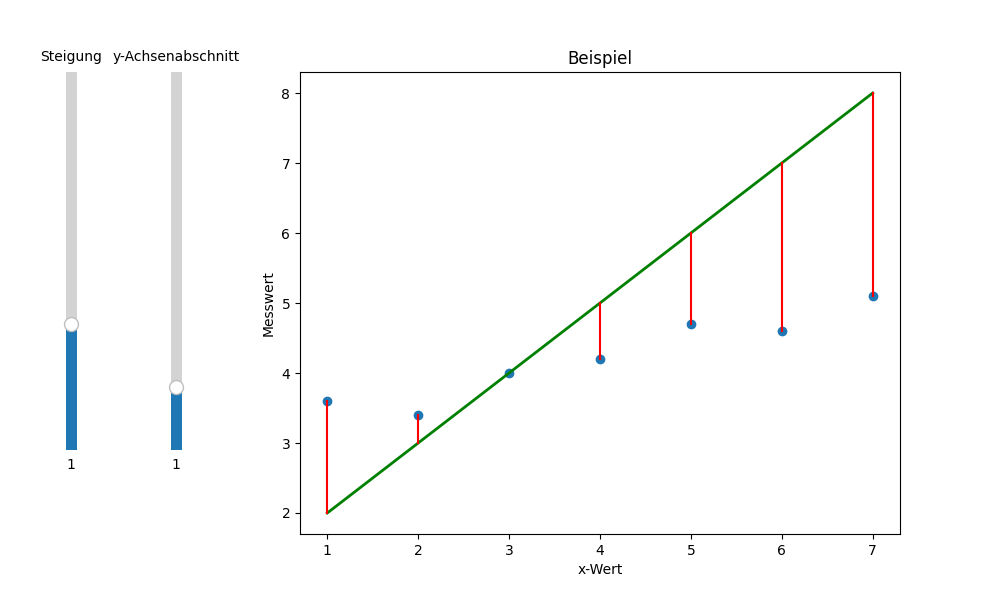

In [4]:
error_lines = {}
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Beispiel")
ax.set_xlabel("x-Wert")
ax.set_ylabel("Messwert")
xs = np.arange(1,8)
messwerte = [3.6, 3.4, 4., 4.2, 4.7, 4.6, 5.1]
ax.scatter(xs, messwerte)
line, = ax.plot(xs, 1*xs+1, 'green', lw=2)
plt.subplots_adjust(left=0.3)


for i in range(len(xs)):
        error_lines[i], = ax.plot((xs[i], xs[i]), (messwerte[i], (1*xs+1)[i]), 'red')

axamp = plt.axes([0.06, 0.25, 0.0225, 0.63])
steig = Slider(
    ax=axamp,
    label="Steigung",
    valmin=0,
    valmax=3,
    valinit=1,
    orientation="vertical"
)

axamp = plt.axes([0.165, 0.25, 0.0225, 0.63])
yachsab = Slider(
    ax=axamp,
    label="y-Achsenabschnitt",
    valmin=-0,
    valmax=6,
    valinit=1,
    orientation="vertical"
)

def update(val):
    new_y_data = xs * steig.val + yachsab.val
    line.set_ydata(new_y_data)
    fig.canvas.draw_idle()
    for i in range(len(xs)):
        error_lines[i].set_ydata((messwerte[i], new_y_data[i]))

def reset(event):
    steig.reset()
    yachsab.reset()

steig.on_changed(update)
yachsab.on_changed(update)

### Optimale Werte berechnen

Es gibt zwei wichtige Formeln für die Berechnung der Steigung (m) und des y-Achsenabschnitts (b).

$$m = \frac{n\cdot \sum(xy) - \sum(x)\sum(y)}{n\cdot \sum(x^2) - \sum(x)^2}$$

$$b = \frac{\sum(y) - m \cdot \sum(x)}{n}$$

Das sieht erstmal kompliziert aus, allerdings haben wir alle Zahlen, die wir in die Formeln einsetzen müssen in der Tabelle oben bereits berechnet. <br>
Das $\sum(x)$ Symbol steht hierbei für die Summe aller x-Werte. Und n steht für die Anzahl unserer Messwerte.

##### Was für Ergebnisse bekommst du, wenn du m und b ausrechnest? Würdest du sagen, dass die Gerade den Trend der Beispiel-Daten gut beschreibt?

Nun kannst du die Formeln verwenden, um mithilfe von Python die regressions Gerade für das große Problem zu berechnen. Mit der Geraden kannst du dann eine Vorhersage tätigen über den zukünftigen Wasserstand.

In [5]:
"""
Berechne nun für unser Wasserstands-Problem m und b für eine regressions Gerade.
TIPP: Du kannst die Summe eines Vectors x mit sum(x) berechnen.
"""

# x und y sind die Werte für die Zeit und den Wasserstand
x = xWerte # Zeitpunkte [0,1,2,3,4,5,6,7,8,9,...]
y = yWerte # Messwerte  [7.98, 8.17, 16.22, 5.49, 10.53, 7.38, ...]

m = ...
b = ...

"""
Wie hoch ist der Wasserstand nach acht Tagen, einen Tag nach unseren Messungen, also für x = 192?
"""

y_192 = ...

### Fragen zu der linearen Regression
#### Welche Aussagen sind korrekt? Erläutere weshalb die falschen Aussagen nicht korrekt sind.
- Die lineare Regression kann zu jeden Daten einen optimalen Trend finden.
- Je kleiner die Differenz zwischen f(x) und den Messwerten, desto besser bildet die regressions Gerade den Trend der Daten ab.
- Statt einer Geraden könnte man auch eine Parabel als Funktion verwenden, um die Daten zu beschreiben.

### Antworten
...

## Höhere Dimensionen

Bislang haben wir uns die lineare Regression nur am Beispiel einer Geraden angeschaut, die durch $f(x)=m\cdot x + b$ abgebildet werden kann.
Aber was passiert wenn wir versuchen den folgenden Datensatz durch lineare Regression mit einer Geraden approximieren möchten?

- Welche Probleme treten hierbei auf?
- Wie können wir unsere Formel $f(x)$ erweitern, um auch diesen Datensatz abzubilden? 

### Antworten
...

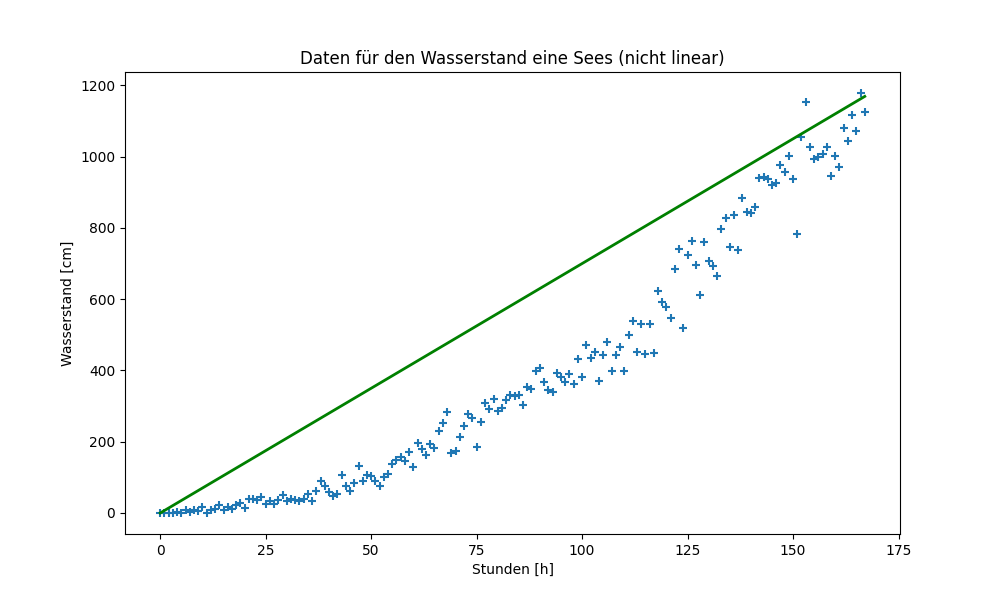

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
line, = plt.plot(xWerte, 7*xWerte, 'green', lw=2)
ax.set_xlabel("Stunden [h]")
ax.set_ylabel("Wasserstand [cm]")
ax.set_title("Daten für den Wasserstand eine Sees (nicht linear)")
ax.scatter(xWerte, 0.1*yWerte*xWerte, marker="+")
plt.show()

#### Erweiterte Formel
Um komplexere Datensätze abzubilden, können wir einfach die Dimension des Polynoms $f$ erhöhen.

Auf deutsch heißt das, dass wir statt $f(x)=m\cdot x + b$ zum Beispiel $f(x)=a\cdot x^2 + b\cdot x + c$ als Formel verwenden.

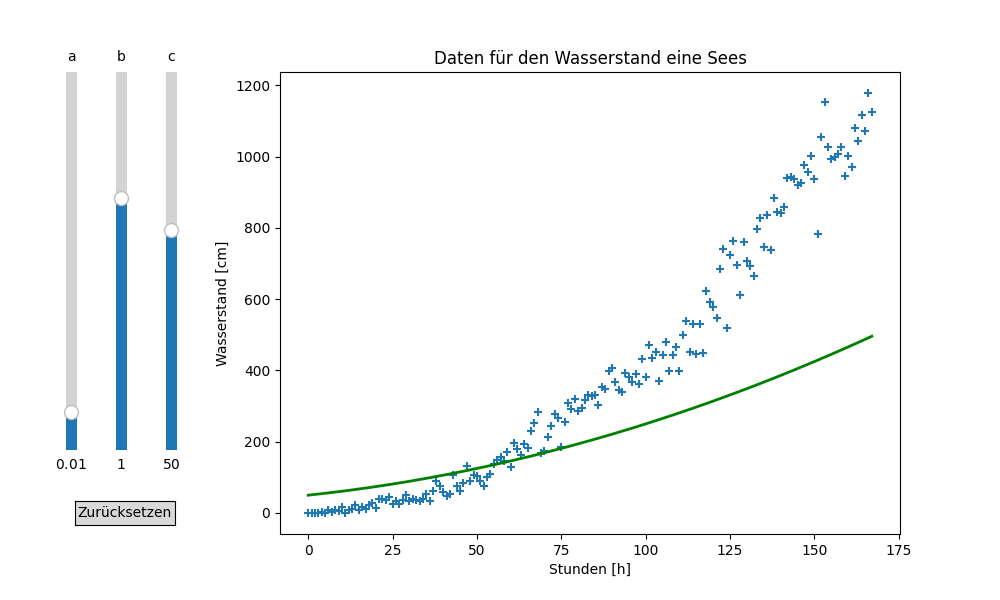

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
line, = plt.plot(xWerte, 0.01*xWerte*xWerte+xWerte+50, 'green', lw=2)
ax.set_xlabel("Stunden [h]")
ax.set_ylabel("Wasserstand [cm]")
ax.set_title("Daten für den Wasserstand eine Sees")
ax.scatter(xWerte, 0.1*xWerte*yWerte, marker="+")
plt.subplots_adjust(left=0.28)

axamp = plt.axes([0.06, 0.25, 0.0225, 0.63])
a = Slider(
    ax=axamp,
    label="a",
    valmin=0,
    valmax=0.1,
    valinit=0.01,
    orientation="vertical"
)

axamp = plt.axes([0.11, 0.25, 0.0225, 0.63])
b = Slider(
    ax=axamp,
    label="b",
    valmin=-3,
    valmax=3,
    valinit=1,
    orientation="vertical"
)

axamp = plt.axes([0.16, 0.25, 0.0225, 0.63])
c = Slider(
    ax=axamp,
    label="c",
    valmin=-20,
    valmax=100,
    valinit=50,
    orientation="vertical"
)

resetax = plt.axes([0.075, 0.125, 0.1, 0.04])
button = Button(resetax, 'Zurücksetzen', hovercolor='0.975')

def update(val):
    line.set_ydata(xWerte * xWerte * a.val + xWerte * b.val + c.val)
    fig.canvas.draw_idle()

def reset(event):
    a.reset()
    b.reset()
    c.reset()

a.on_changed(update)
b.on_changed(update)
c.on_changed(update)
button.on_clicked(reset)

plt.show()

#### Automatische Berechnung

Glücklicherweise gibt es für dieses Problem sehr viele Tools die wir verwenden können um uns die Berechnung für beliebige Polynome zu erleichtern.

Das Python Paket Numpy ist ein solches Tool, welches speziell für mathematische Berechnungen gedacht ist und als solches auch eine Methode $polyfit$ bereitstellt, welche uns die notwendigen Parameter ausrechnet. <br>
Hierfür müssen wir der Methode zwei Arrays mit den x-Werten und den y-Werten übergeben, und als dritten Parameter die Dimension des Polynoms.

Verwende die Numpy Methode um die optimalen Parameter für den Graphen oben zu finden. <br>
Tipp: In unserem Fall suchen wir das Polynom mit Dimension 2.

In [21]:
xs = xWerte
ys = (0.1*xWerte*yWerte)

# TODO
# np.polyfit(...)